In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from datetime import datetime, timedelta

from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler

from numpy import linspace
from scipy.stats.kde import gaussian_kde

# from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource, FixedTicker, PrintfTickFormatter
from bokeh.plotting import figure
from bokeh.sampledata.perceptions import probly

import colorcet as cc

from bokeh.plotting import figure
from bokeh.io import output_file, show
from bokeh.io import output_notebook, push_notebook, show

bokeh.io.reset_output()
output_notebook()
import bokeh



Loading BokehJS ...

In [111]:
# Read in the csv file which contains data
df = pd.read_csv('kc_house_data.csv')

In [112]:
# Let's take a look at the first few columns
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0         NaN   0.0     ...          7        1180   
1      7242     2.0         0.0   0.0     ...          7        2170   
2     10000     1.0         0.0   0.0     ...          6         770   
3      5000     1.0         0.0   0.0     ...          7        1050   
4      8080     1.0         0.0   0.0     ...          8        1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [113]:
df = df.drop(columns=['waterfront', 'id','view', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'sqft_basement'], axis=1)

In [114]:
df.sample(5)

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
15356  8/22/2014   436000.0         4       2.00         1600     15044   
20771  6/27/2014   483453.0         4       2.75         2790      5527   
1555    1/5/2015   937500.0         5       3.75         4210     14599   
20017  6/18/2014   580000.0         4       2.50         3250      5000   
9120   6/11/2014  1090000.0         5       2.50         2340      6000   

       floors  condition  grade  sqft_above  yr_built  zipcode      lat  \
15356     1.0          3      7        1600      1972    98034  47.7200   
20771     2.0          3      8        2790      2014    98045  47.4827   
1555      2.0          3     10        4210      2004    98065  47.5364   
20017     2.0          3      8        3250      2008    98059  47.4988   
9120      2.0          4     10        2340      1922    98144  47.5764   

          long  
15356 -122.216  
20771 -121.773  
1555  -121.858  
20017 -122.148  
9120  -122.287

In [115]:
# Change the date so it's numbers
df.dtypes

date            object
price          float64
bedrooms         int64
bathrooms      float64
sqft_living      int64
sqft_lot         int64
floors         float64
condition        int64
grade            int64
sqft_above       int64
yr_built         int64
zipcode          int64
lat            float64
long           float64
dtype: object

In [116]:
# creating a function which can split the year and month as seperate columns in df

def date_spliter(df):
    df['year']=df['date'].apply(lambda x: int(x.split('/')[-1]))
    df['month']=df['date'].apply(lambda x: int(x.split('/')[0]))
date_spliter(df)
    

In [117]:
# Inspecting our df
df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  10/13/2014  221900.0         3       1.00         1180      5650     1.0   
1   12/9/2014  538000.0         3       2.25         2570      7242     2.0   
2   2/25/2015  180000.0         2       1.00          770     10000     1.0   
3   12/9/2014  604000.0         4       3.00         1960      5000     1.0   
4   2/18/2015  510000.0         3       2.00         1680      8080     1.0   

   condition  grade  sqft_above  yr_built  zipcode      lat     long  year  \
0          3      7        1180      1955    98178  47.5112 -122.257  2014   
1          3      7        2170      1951    98125  47.7210 -122.319  2014   
2          3      6         770      1933    98028  47.7379 -122.233  2015   
3          5      7        1050      1965    98136  47.5208 -122.393  2014   
4          3      8        1680      1987    98074  47.6168 -122.045  2015   

   month  
0     10  
1     12  
2      2  
3     12  
4      2

In [118]:
# dropping the date column
df = df.drop(columns=['date'])

In [119]:
df = df.rename(columns = {'year':'year_bought', 'month':'month_bought'})
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  \
0  221900.0         3       1.00         1180      5650     1.0          3   
1  538000.0         3       2.25         2570      7242     2.0          3   
2  180000.0         2       1.00          770     10000     1.0          3   
3  604000.0         4       3.00         1960      5000     1.0          5   
4  510000.0         3       2.00         1680      8080     1.0          3   

   grade  sqft_above  yr_built  zipcode      lat     long  year_bought  \
0      7        1180      1955    98178  47.5112 -122.257         2014   
1      7        2170      1951    98125  47.7210 -122.319         2014   
2      6         770      1933    98028  47.7379 -122.233         2015   
3      7        1050      1965    98136  47.5208 -122.393         2014   
4      8        1680      1987    98074  47.6168 -122.045         2015   

   month_bought  
0            10  
1            12  
2             2  
3            12  
4             2

In [120]:
df['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

In [125]:
# no. of sales per zip code on average
len(df)/len(df['zipcode'].unique())

308.5285714285714

### Plotting our columns against each other 

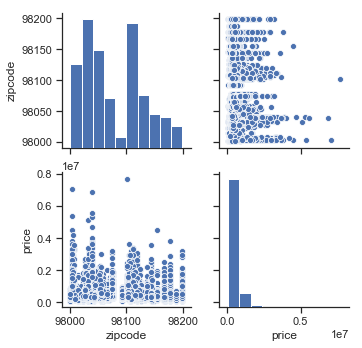

In [122]:
# Let's make a pairplot with seaborn to check the distribution
# and relationship between our dataset. 
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df[['zipcode', 'price']])

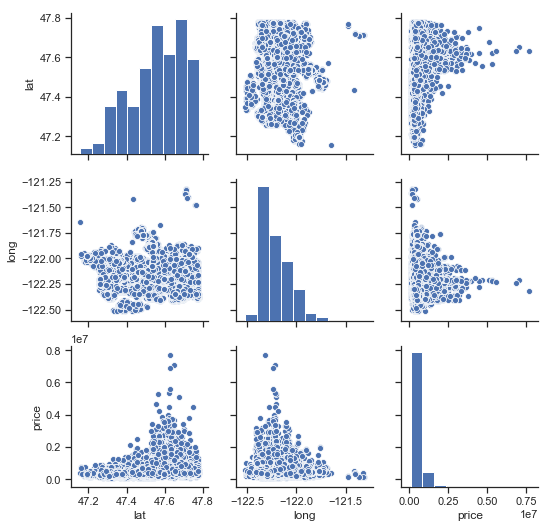

In [123]:
# Let's make a pairplot with seaborn to check the distribution
# and relationship between our dataset. 
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df[['lat', 'long', 'price']])

In [131]:
# # dropping the date column
 df = df.drop(columns=['lat', 'long'])

In [132]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  \
0  221900.0         3       1.00         1180      5650     1.0          3   
1  538000.0         3       2.25         2570      7242     2.0          3   
2  180000.0         2       1.00          770     10000     1.0          3   
3  604000.0         4       3.00         1960      5000     1.0          5   
4  510000.0         3       2.00         1680      8080     1.0          3   

   grade  sqft_above  yr_built  zipcode  year_bought  month_bought  
0      7        1180      1955    98178         2014            10  
1      7        2170      1951    98125         2014            12  
2      6         770      1933    98028         2015             2  
3      7        1050      1965    98136         2014            12  
4      8        1680      1987    98074         2015             2

In [74]:
# # check the relationship between datasets using regression. 
# g = sns.pairplot(df, kind="reg")
df

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  \
0  221900.0         3       1.00         1180      5650     1.0          3   
1  538000.0         3       2.25         2570      7242     2.0          3   
2  180000.0         2       1.00          770     10000     1.0          3   
3  604000.0         4       3.00         1960      5000     1.0          5   
4  510000.0         3       2.00         1680      8080     1.0          3   

   grade  sqft_above  yr_built  zipcode      lat     long  year_bought  \
0      7        1180      1955    98178  47.5112 -122.257         2014   
1      7        2170      1951    98125  47.7210 -122.319         2014   
2      6         770      1933    98028  47.7379 -122.233         2015   
3      7        1050      1965    98136  47.5208 -122.393         2014   
4      8        1680      1987    98074  47.6168 -122.045         2015   

   month_bought  
0            10  
1            12  
2             2  
3            12  
4             2

In [136]:
# changed values of zip column into dummy categorical variable 
zip_dummy = pd.get_dummies(df['zipcode'], prefix='ZIP')
df = df.drop(columns=['zipcode'])
df = pd.concat([df, zip_dummy], axis=1)

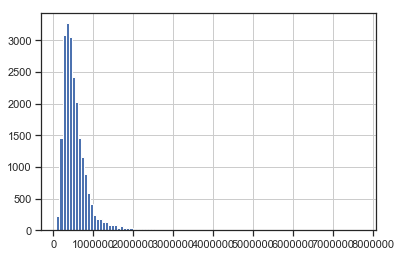

In [140]:
df['price'].hist(bins=100)

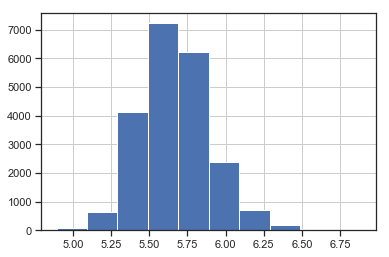

In [144]:
# Looking at price and number of sales at this price
df['price'] = df['price'].apply(lambda x: np.log10(x))
df['price'].hist()

In [145]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  \
0  5.346157         3       1.00         1180      5650     1.0          3   
1  5.730782         3       2.25         2570      7242     2.0          3   
2  5.255273         2       1.00          770     10000     1.0          3   
3  5.781037         4       3.00         1960      5000     1.0          5   
4  5.707570         3       2.00         1680      8080     1.0          3   

   grade  sqft_above  yr_built    ...      ZIP_98146  ZIP_98148  ZIP_98155  \
0      7        1180      1955    ...              0          0          0   
1      7        2170      1951    ...              0          0          0   
2      6         770      1933    ...              0          0          0   
3      7        1050      1965    ...              0          0          0   
4      8        1680      1987    ...              0          0          0   

   ZIP_98166  ZIP_98168  ZIP_98177  ZIP_98178  ZIP_98188  ZIP_98198  ZIP_98199  
0          0          0          0          1          0          0          0  
1          0          0          0          0          0          0          0  
2          0          0          0          0          0          0          0  
3          0          0          0          0          0          0          0  
4          0          0          0          0          0          0          0  

[5 rows x 82 columns]

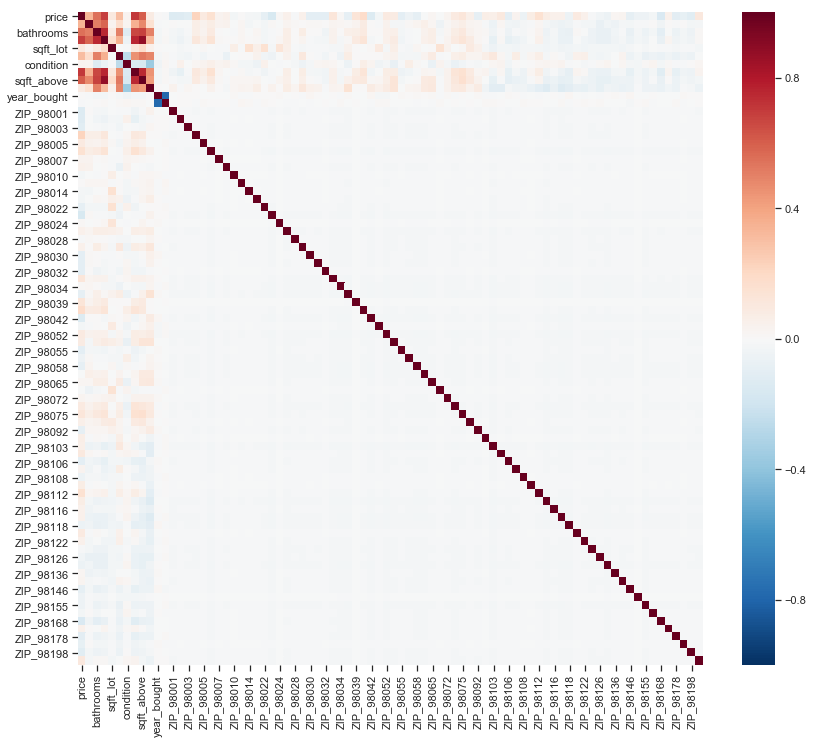

In [149]:
correlation = df.corr()
plt.figure(figsize=(14,12))
heatmap=sns.heatmap(correlation, annot=False, linewidths=0, vmin=-1, cmap="RdBu_r")

In [151]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'yr_built', 'year_bought',
       'month_bought', 'ZIP_98001', 'ZIP_98002', 'ZIP_98003', 'ZIP_98004',
       'ZIP_98005', 'ZIP_98006', 'ZIP_98007', 'ZIP_98008', 'ZIP_98010',
       'ZIP_98011', 'ZIP_98014', 'ZIP_98019', 'ZIP_98022', 'ZIP_98023',
       'ZIP_98024', 'ZIP_98027', 'ZIP_98028', 'ZIP_98029', 'ZIP_98030',
       'ZIP_98031', 'ZIP_98032', 'ZIP_98033', 'ZIP_98034', 'ZIP_98038',
       'ZIP_98039', 'ZIP_98040', 'ZIP_98042', 'ZIP_98045', 'ZIP_98052',
       'ZIP_98053', 'ZIP_98055', 'ZIP_98056', 'ZIP_98058', 'ZIP_98059',
       'ZIP_98065', 'ZIP_98070', 'ZIP_98072', 'ZIP_98074', 'ZIP_98075',
       'ZIP_98077', 'ZIP_98092', 'ZIP_98102', 'ZIP_98103', 'ZIP_98105',
       'ZIP_98106', 'ZIP_98107', 'ZIP_98108', 'ZIP_98109', 'ZIP_98112',
       'ZIP_98115', 'ZIP_98116', 'ZIP_98117', 'ZIP_98118', 'ZIP_98119',
       'ZIP_98122', 'ZIP_98125', 'ZIP_98126', 'ZIP_98133'

In [152]:
df = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'yr_built', 'year_bought',
       'month_bought']]

### Correlation Matrix 

In [153]:
correlation = df.corr()
plt.figure(figsize=(14,12))
heatmap=sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

There are strong correlations between price and grade, as well as price and sqft_living. Sqft_living and Sqft_above might be redundant. 

In [154]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'yr_built', 'year_bought',
       'month_bought'],
      dtype='object')

### Scaling of columns 

In [157]:
# scaling
b = df['sqft_living']
df['sqft_living'] = (b-min(b))/(max(b)-min(b))

b = df['sqft_above']
df['sqft_above'] = (b-min(b))/(max(b)-min(b))

b = df['sqft_lot']
df['sqft_lot'] = (b-min(b))/(max(b)-min(b))

b = df['year_bought']
df['year_bought'] = (b-min(b))/(max(b)-min(b))

b = df['yr_built']
df['yr_built'] = (b-min(b))/(max(b)-min(b))

# standardization
b = df['price']
y = (b-np.mean(b))/(np.sqrt(np.var(b)))

/Users/physics/anaconda/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/physics/anaconda/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/physics/anaconda/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [158]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  \
0  5.346157         3       1.00     0.061503  0.003108     1.0          3   
1  5.730782         3       2.25     0.167046  0.004072     2.0          3   
2  5.255273         2       1.00     0.030372  0.005743     1.0          3   
3  5.781037         4       3.00     0.120729  0.002714     1.0          5   
4  5.707570         3       2.00     0.099468  0.004579     1.0          3   

   grade  sqft_above  yr_built  year_bought  month_bought  
0      7    0.089602  0.478261          0.0            10  
1      7    0.199115  0.443478          0.0            12  
2      6    0.044248  0.286957          1.0             2  
3      7    0.075221  0.565217          0.0            12  
4      8    0.144912  0.756522          1.0             2

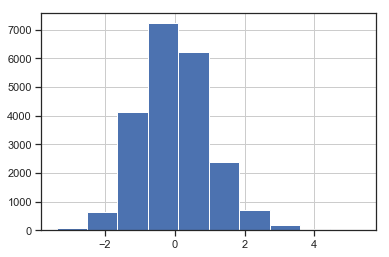

In [160]:
y.hist()

### Dropping the target variable and running linear regression model

In [161]:
df = df.drop(columns=['price'])

### Splitting the data 

In [162]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.20)

### Making the model and fitting the model

In [163]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Calculating the residuals and mean squar error 

In [164]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.35865739297328403
Test Mean Squarred Error: 0.3710776895957231


### Given a random row of parameters from our test data

In [180]:
X_test.head()
x = X_test.iloc[0]
x

bedrooms        3.000000
bathrooms       2.000000
sqft_living     0.065300
sqft_lot        0.004403
floors          1.000000
condition       3.000000
grade           7.000000
sqft_above      0.095133
yr_built        0.817391
year_bought     1.000000
month_bought    4.000000
Name: 5831, dtype: float64

### Our model predicts this price:

In [182]:
linreg.predict([x])

array([-0.90702186])

### The real price is this:

In [183]:
 y_test.iloc[0]

-0.9739658530952735

In [191]:
plt.scatter(y_test, linreg.predict(X_test))
plt.plot([-5, 10], [-5, 10], c='red', linestyle='--')

plt.xlim([-3.5,5])
plt.ylim([-3.5,5])
plt.xlabel('Actual Price of House (scaled)')
plt.ylabel('Predicted Price of House (scaled)')

Text(0, 0.5, 'Predicted Price of House (scaled)')

In [207]:
# Need to get a couple of parameters: mean price and variance of price
df_orig = pd.read_csv('kc_house_data.csv')
y_real = df_orig['price']

price_mean = np.mean(np.log10(y_real))
price_var = np.var(np.log10(y_real))

In [208]:
def get_price(scaled_price):
    # y = (b-np.mean(b))/(np.sqrt(np.var(b)))
    # (y * np.sqrt(np.var(b))) + np.mean(b) --> b
    return 10**( (scaled_price * np.sqrt(price_var)) + price_mean)

In [209]:
print('price var', np.sqrt(price_var))
print('mean', price_mean)
print((-0.9739658530952735*np.sqrt(price_var)) + price_mean)

price var 0.22867456200986755
mean 5.666766010787205
5.444044795918076


Text(0, 0.5, 'Predicted Price of House')

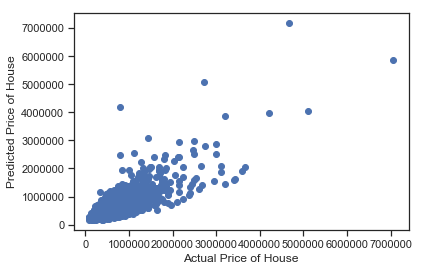

In [210]:
plt.scatter(list(map(get_price, y_test)), list(map(get_price, linreg.predict(X_test))))
# plt.plot([-5, 10], [-5, 10], c='red', linestyle='--')

# plt.xlim([-3.5,5])
# plt.ylim([-3.5,5])
plt.xlabel('Actual Price of House')
plt.ylabel('Predicted Price of House')

In [211]:
get_price( y_test.iloc[0])

277999.99999999994

In [215]:
get_price(linreg.predict([X_test.iloc[0]])[0])

287973.9367793239

In [219]:
def ridge(category, data, scale=20):
    return list(zip([category]*len(data), scale*data))

cats = list(df_orig['zipcode'].unique().astype(str))

palette = [cc.rainbow[i*3] for i in range(len(cats))]

x = linspace(-10,110, 500)

source = ColumnDataSource(data=dict(x=x))

p = figure(y_range=cats, plot_width=400, plot_height=2000, x_range=(0,10), toolbar_location=None)
    
for i, cat in enumerate(reversed(cats)):
    pdf = gaussian_kde((df_orig[df_orig['zipcode']==int(cat)]['price']-df_orig['price'].min())/(df_orig['price'].max()-df_orig['price'].min())*100.0)
    y = ridge(cat, pdf(x),1)
    source.add(y, cat)
    p.patch('x', cat, color=palette[i], alpha=0.8, line_color="black", source=source)
    
        
p.outline_line_color = None
p.background_fill_color = "#efefef"

p.xaxis.ticker = FixedTicker(ticks=list(range(0, 101, 10)))
p.xaxis.formatter = PrintfTickFormatter(format="%d%%")

p.ygrid.grid_line_color = None
p.xgrid.grid_line_color = "#dddddd"
p.xgrid.ticker = p.xaxis[0].ticker

p.axis.minor_tick_line_color = None
p.axis.major_tick_line_color = None
p.axis.axis_line_color = None

p.y_range.range_padding = 0.12

show(p,notebook_handle=True);
